In [1]:
%matplotlib inline
import openpathsampling as paths
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
filename = "alanine_dipeptide_tps.nc"
#filename = "saved_AD_tps.nc"

In [3]:
flexible = paths.AnalysisStorage(filename)
size_bytes = os.path.getsize(filename)
print "File size: {0:.1f}GB for {1} steps, {2} snapshots".format(
    size_bytes / 1024.0 / 1024.0 / 1024.0,
    len(flexible.steps),
    len(flexible.snapshots)
)

File size: 1.8GB for 1737 steps, 96746 snapshots


In [4]:
flex_scheme = flexible.schemes[0]

In [5]:
flex_scheme.move_summary(flexible)

shooting ran 99.942% (expected 100.00%) of the cycles with acceptance 1104/1736 (63.59%)


In [6]:
# TODO: move tree (partial)
import openpathsampling.visualize as visualizations
from IPython.display import SVG

history = visualizations.ReplicaHistoryTree(
    storage=flexible,
    steps=flexible.steps[0:50],
    replica=0
)

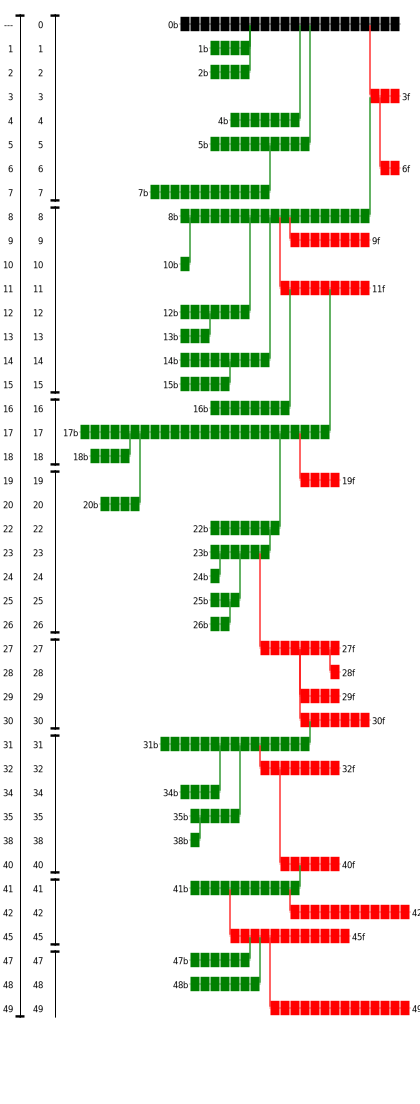

In [7]:
history.view.zoom = 1.0
history.view.scale_y = 24
history.view.scale_x = 10
history.view.font_size = 0.35
history.view.horizontal_gap = 0.05

SVG(history.view.to_svg())

Maximum 251


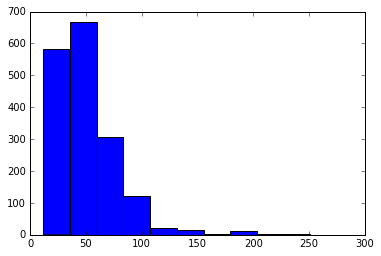

In [8]:
# TODO: path length histogram
path_lengths = [len(step.active[0].trajectory) for step in flexible.steps]
plt.hist(path_lengths);
print "Maximum", max(path_lengths)

In [9]:
# TODO: path density plots (arbitrary dimension!)

In [10]:
# TODO: "transition state analysis"
# my thought: 
# * pick 100 (decorrelated) trajectories
# * take every 3rd frame (or something like that)
# * run 50 (or 100?) committor shots with randomized initial velocities
# * say something about which points are likely at/near the 50% isocommittor

In [18]:
import nglview as nv
nv.show_mdtraj(traj.md())

Widget Javascript not detected.  It may not be installed properly.
